Проект: Статистический анализ данных 
В налчии имеются данные о некоторых пользователях из нескольких городов, а также об их поездках от сервиса аренды самокатов GoFast.
Задачи:
1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение данных
5. Подтсчет выручки
6. Проверка гипотез:
а. Тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
б. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Необходимо проверить гипотезу и сделать выводы.
в. Проверка гипотезы о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
г. Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Шаг 1. Загрузка данных

In [1]:
#загрузим все необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom
import seaborn as sns

In [2]:
#прочитаем все файлы и сохраним датафреймы в переменные
try:
    data_users = pd.read_csv('C:/Users/user/Downloads/users_go.csv')
except:
    data_users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')

In [3]:
try:
    rides_go_fast = pd.read_csv('C:/Users/user/Downloads/rides_go.csv')
except:
    rides_go_fast = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')

In [4]:
try:
    subscriptions_go_fast = pd.read_csv('C:/Users/user/Downloads/subscriptions_go.csv')
except:
    subscriptions_go_fast = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

In [5]:
#выведем первые строки каждого набора данных

In [6]:
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [7]:
rides_go_fast.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [8]:
subscriptions_go_fast.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Изучим общую информацию о первом наборе данных data_users

In [9]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [10]:
#посчитаем количество явных дубликатов
data_users.duplicated().sum()

31

Вывод: в data_users 1565 записей, количество явных дубликатов 31

Изучим общую информацию о наборе данных rides_go_fast

In [11]:
rides_go_fast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [12]:
#посчитаем количество явных дубликатов
rides_go_fast.duplicated().sum()

0

Вывод: в rides_go_fast 18068 записей, количеств явных дубликатов 0

Изучим общую информацию о наборе данных subscriptions_go_fast

In [13]:
subscriptions_go_fast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [14]:
#посчитаем количество явных дубликатов
subscriptions_go_fast.duplicated().sum()

0

Вывод: в subscriptions_go_fast 2 записи, количеств явных дубликатов 0

Шаг 2. Предобработка данных

Столбец date в датафрейме rides_go_fast имеет тип object, приведем его к к типу даты pandas.

In [15]:
rides_go_fast['date'] = pd.to_datetime(rides_go_fast['date'])

In [16]:
#проверим получилось ли изменить тип данных
rides_go_fast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Создадим новый столбец с номером месяца на основе столбца date.

In [17]:
rides_go_fast['month'] = rides_go_fast['date'].dt.month

In [18]:
#проверим 
rides_go_fast.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Количество явных дубликатов посчитали в шаге 1, у data_users 31 явный дубликат
у rides_go_fast и subscriptions_go_fast явных дубликатов нет

In [19]:
#удалим явные дубликаты у data_users
data_users.drop_duplicates(inplace=True)

In [20]:
#проверим удалились ли дубликаты
data_users.duplicated().sum()

0

в датафрейме rides_go_fast округлим значения столбца distance до 2 знаков после запятой

In [21]:
rides_go_fast['distance'] = rides_go_fast['distance'].round(2)

Рассмотрим количество пропусков в таблицах

In [22]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [23]:
rides_go_fast.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [24]:
subscriptions_go_fast.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Вывод: пропущенных данных в таблицах нет

Шаг 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках:
- частота встречаемости городов
- соотношение пользователей с подпиской и без подписки
- возраст пользователей
- расстояние, которое пользователь преодолел за одну поездку
- продолжительность поездок

Изучим частоту встречаемости в городах

In [25]:
frequency_in_city = data_users['city'].value_counts()

In [26]:
frequency_in_city

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Text(0.5, 0, 'Количество пользователей')

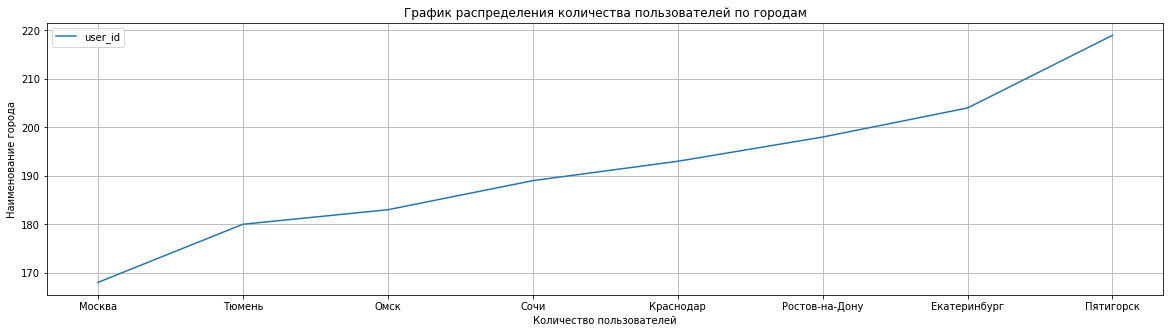

In [27]:
#построим график распределения количества прользователей от города
data_users.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=True).plot(grid=True, figsize=(20, 5))
plt.title('График распределения количества пользователей по городам')
plt.ylabel('Наименование города')
plt.xlabel('Количество пользователей')

Вывод: чаще всего пользователи встречаются в Пятигорске, затем Екатеринбург, Ростов-на-Дону. Меньше всего пользователей в Москве.

Изучим соотношение пользователей с подпиской и без подписки

In [28]:
users_sub = data_users['subscription_type'].value_counts()

In [29]:
users_sub

free     835
ultra    699
Name: subscription_type, dtype: int64

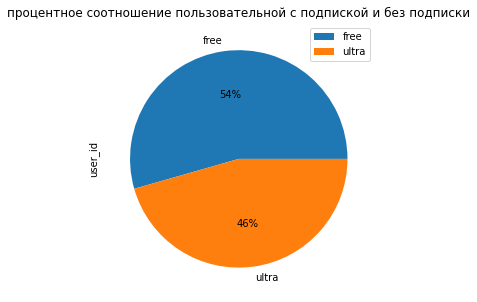

In [30]:
data_users.pivot_table(index='subscription_type', values='user_id', aggfunc='count').plot.pie(y='user_id', autopct = '%1.0f%%', figsize=(5,5))
plt.title('процентное соотношение пользовательной с подпиской и без подписки')
plt.show()

Вывод: количество пользователей без подписки 54%, с подпиской 46%. 

Определим зависимость возраста пользователей 

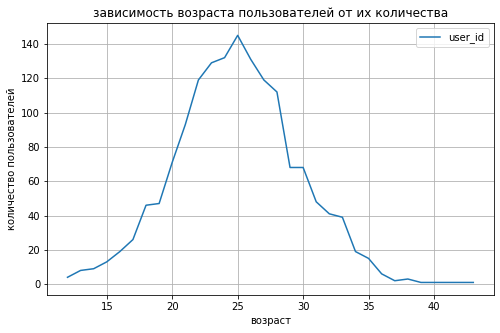

In [31]:
data_users.pivot_table(index='age', values='user_id', aggfunc='count').sort_values(by='age', ascending=True).plot(grid=True, figsize=(8, 5))
plt.title('зависимость возраста пользователей от их количества')
plt.xlabel('возраст')
plt.ylabel('количество пользователей')
plt.show()

Вывод: самый популярный возраст среди пользователей сервиса 25 лет

In [32]:
data_users['age'].describe().round()

count    1534.0
mean       25.0
std         5.0
min        12.0
25%        22.0
50%        25.0
75%        28.0
max        43.0
Name: age, dtype: float64

Вывод: минимальный возраст пользователей 12 лет, максимальный возраст 43 года. Медианное значение возраста 25 лет. Первый квартиль 22 года, второй 28 лет. В данных аномали не наблюдается, распределение похоже на нормальное.

Определим расстояние, которое пользователь преодолел за одну поездку

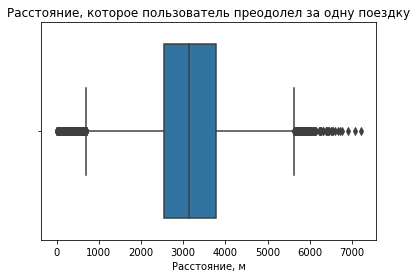

In [33]:
sns.boxplot(x = rides_go_fast['distance'])
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Расстояние, м')
plt.show()

In [34]:
rides_go_fast['distance'].describe() 

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

Вывод: медиана поездок 3133 метра, первый квартиль 2543 м, второй 3776 метра. Максимальная дистанция составляет 7211 м, минимальная 0,86м. 

Изучим продолжительность поездок

In [35]:
rides_go_fast['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Вывод: медианное значение времени проведенного в поездке 17,67 минут, первый квартиль 13,6 минут, второй 21,7. минимальное время в поездке пол минуты, максимальное 40,8 минут.

Шаг 4. Объединение данных

Проверим размерность датасетов.

In [37]:
data_users #выведем на экран датафрейм data_users

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free


Размер датасета data_users 1534 на 5

In [38]:
rides_go_fast #выведем на экран датасет rides_go_fast

,user_id,distance,duration,date,month
0,1,4409.92,25.599769,2021-01-01,1
1,1,2617.59,15.816871,2021-01-18,1
2,1,754.16,6.232113,2021-04-20,4
3,1,2694.78,18.511000,2021-08-11,8
4,1,4028.69,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.10,19.822962,2021-11-04,11
18064,1534,2840.42,21.409799,2021-11-16,11
18065,1534,3826.19,18.435051,2021-11-18,11
18066,1534,2902.31,16.674362,2021-11-27,11


размерность датафрейма 18068 на 5

In [39]:
subscriptions_go_fast #выведем на экран датафрейм subscriptions_go_fast

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Размер датафрейма subscriptions_go_fast 2 на 4

Объединим данные о пользователях, поездках и подписках в один датафрейм с помощью метода merge()

In [40]:
data_summ = data_users.merge(rides_go_fast) #объединили первые два датафрейма

In [41]:
data_summ = data_summ.merge(subscriptions_go_fast) #добавили третий датафрейм и перезаписали data_summ

In [42]:
data_summ #выведем на экран объединенный датафрейм

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.10,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.42,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.19,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.31,16.674362,2021-11-27,11,8,50,0


Размерность объединенного датафрейма 18068 на 12. 
Размеры предыдущих датафреймов 1534 на 5, 18068 на 5, 2 на 4. Количество столбцов получилось 12, поскольку два из них в первых двух датафреймах повторяются.

Создадим датафрейм c данными о пользователях без подписки

Создадим датафрейм пользователей без подписки

In [43]:
data_not_sub = data_summ[data_summ['subscription_type'] == 'free']

In [44]:
data_not_sub #выведем на экран получившийся датафрейм

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.10,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.42,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.19,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.31,16.674362,2021-11-27,11,8,50,0


Создадим датафрейм c данными о пользователях с подпиской

In [45]:
data_sub_ultra = data_summ[data_summ['subscription_type'] == 'ultra']

In [46]:
data_sub_ultra #выведем на экран получившийся датафрейм

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.05,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.70,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.16,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.85,15.839579,2021-10-17,10,6,0,199


Визуализируем информацию о расстоянии для пользователей без подписки

Построим гистограмму зависимости расстояния от количества поездок у пользователей без подписки

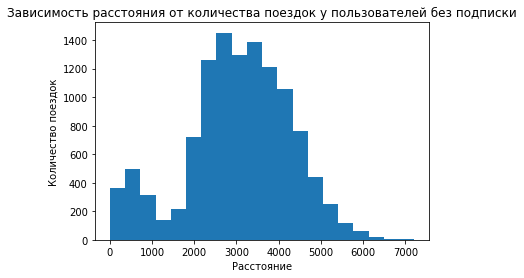

<Figure size 2160x2160 with 0 Axes>

In [47]:
plt.hist(data_not_sub['distance'], bins=20)
plt.title('Зависимость расстояния от количества поездок у пользователей без подписки')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.figure(figsize=(30,30))
plt.show()

In [48]:
data_not_sub['distance'].describe()

count    11568.000000
mean      3045.495284
std       1246.173810
min          0.860000
25%       2366.560000
50%       3114.650000
75%       3905.695000
max       7211.010000
Name: distance, dtype: float64

медианное значение расстояния для тарифа с бесплатной подпиской составляет 3114 метров, первый квартиль 2366, второй 3905 метров

Визуализируем информацию о времени поездок для пользователей без подписки

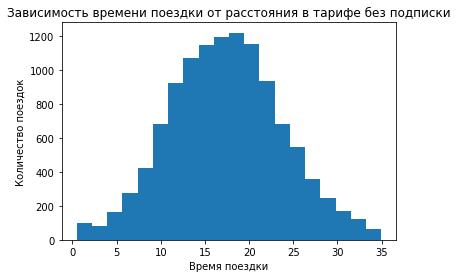

<Figure size 2160x2160 with 0 Axes>

In [49]:
plt.hist(data_not_sub['duration'], bins=20)
plt.title('Зависимость времени поездки от расстояния в тарифе без подписки')
plt.xlabel('Время поездки')
plt.ylabel('Количество поездок')
plt.figure(figsize=(30,30))
plt.show()

In [50]:
data_not_sub['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

Медианное значение времени для тарифа без подписки 17,3 минуты. Первый квартиль 13 минут, второй 21,5. Максимальное время поездки почти 35 минуи, минимальное пол минуты

Построим гистограмму зависимости расстояния от количества поездок у пользователей с подпиской

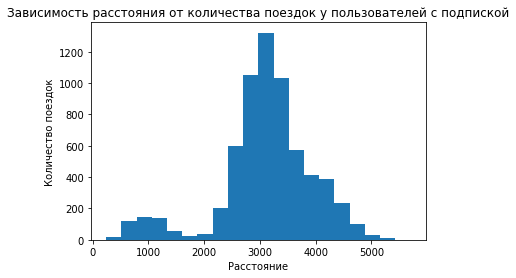

<Figure size 2160x2160 with 0 Axes>

In [51]:
plt.hist(data_sub_ultra['distance'], bins=20)
plt.title('Зависимость расстояния от количества поездок у пользователей с подпиской')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.figure(figsize=(30,30))
plt.show()

In [52]:
data_sub_ultra['distance'].describe()

count    6500.000000
mean     3115.445431
std       836.895369
min       244.210000
25%      2785.447500
50%      3148.640000
75%      3560.577500
max      5699.770000
Name: distance, dtype: float64

Медианное значение расстояния у пользователей с платной подпиской 3148 метров, первый квартиль 2785,5м, второй 3560. Максимальная дистанция 5699, минимальная 244 метра.

Визуализируем информацию о времени поездок для пользователей с подпиской

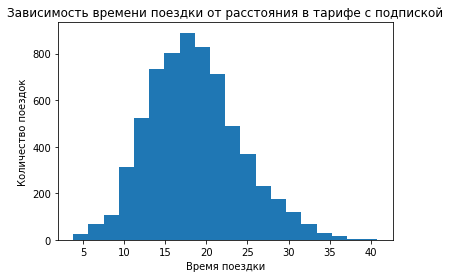

<Figure size 2160x2160 with 0 Axes>

In [53]:
plt.hist(data_sub_ultra['duration'], bins=20)
plt.title('Зависимость времени поездки от расстояния в тарифе с подпиской')
plt.xlabel('Время поездки')
plt.ylabel('Количество поездок')
plt.figure(figsize=(30,30))
plt.show()

In [54]:
data_sub_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

Медианное значение времени у пользователей с платной подпиской составляет 18 минут, первый квартиль 14,5, второй 21,8 минут. Максимальная длительность поездки почти 41 минута, минимальное 3,7 минут.

Выводы: Наличие платной подписки влияет на медианное значение времени поездки, с подпиской оно составляет 18 минут, без подписки 17,3 минуты. Также отличаются квартили, в тарифе без подписки от 13 до 21,5 минут, с подпиской от 14,5 до 21,8 минут. В среднем пользователи дольше используют самокаты на платном тарифе.
Наличие платной подписки также влияет и на расстояние поездки. Медианное у платного тарифа составляет 3148 метров, тогда как у пользователей без платного тарифа 3114 метров. Квартили тоже отличаются, у пользователей платной подписки первый квартиль 2785,5м, второй 3560, у пользователей без платного тарифа первый квартиль 2366, второй 3905 метров.
Общий вывод: У пользователей, у которых имеется платный тариф, в среднем, продолжительность и дальность поездок выше, чем у пользователей без подписки.

Шаг 5. Подсчёт выручки

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4. Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Создадим новый датафрейм и добавим со столбцами distance duration minute_price start_ride_price	subscription_fee

In [55]:
data_summ['duration'] = np.ceil(data_summ['duration']) #окгруглим время каждой поездки в большую второну до минуты 

In [56]:
users_info_month = data_summ.pivot_table(index=('month', 'user_id'), values=('distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee'), 
    aggfunc=({'distance':{'count', 'sum'},
             'duration':'sum',
             'minute_price':'mean',
             'start_ride_price':'mean',
             'subscription_fee':'mean'}))
users_info_month.columns = ['count', 'distance', 'duration', 'minute_price','start_ride_price', 'subscription_fee']

In [57]:
users_info_month #выведем получившийся датафрейм

count  distance  duration  minute_price  start_ride_price  \
month user_id                                                              
1     1            2   7027.51      42.0             6                 0   
      3            1   3061.78      13.0             6                 0   
      5            1   3914.65      13.0             6                 0   
      7            2   6478.08      28.0             6                 0   
      12           1   3577.15      33.0             6                 0   
...              ...       ...       ...           ...               ...   
12    1525         1   4597.85      34.0             8                50   
      1526         1   3644.12      23.0             8                50   
      1528         1   3998.57      11.0             8                50   
      1532         2   6111.89      42.0             8                50   
      1534         1   2371.71      16.0             8                50   

               subscription_fee  
month user_id                    
1     1                     199  
      3                     199  
      5                     199  
      7                     199  
      12                    199  
...                         ...  
12    1525                    0  
      1526                    0  
      1528                    0  
      1532                    0  
      1534                    0  

[11331 rows x 6 columns]

In [58]:
users_info_month['total'] = (users_info_month['start_ride_price'] * users_info_month['count'] + users_info_month['minute_price'] * users_info_month['duration'] 
                             + users_info_month['subscription_fee']).round(1)
#посчитали сумму потраченную каждым пользователем за месяц и добавили эти данные в новый столбец total и округлили значения до 1 знака после запятой

Выводы: создали датафрейм users_info_month, в котором указали суммарное расстояние, суммарное время, количество поездок, стоимость одной минуты в зависимости от тарифа, стоимость подписки. Посчитали для каждого пользователя выручку за месяц, записали в столбец total. 

Шаг 6. Проверка гипотез

Тратят ли пользователи с подпиской больше времени на поездки?

Выдвенем гипотезы:

Но: продолжительность поездки (duration) у пользователей с платной подпиской ultra = продолжительности поездки (duration) у пользователей без подписки free

Н1: продолжительность поездки (duration) у пользователей с платной подпиской ultra > продолжительности поездки (duration) у пользователей без подписки free

In [59]:
sub_ultra = data_sub_ultra['duration'] 
not_sub = data_not_sub['duration']
results = st.ttest_ind(sub_ultra, not_sub, alternative = 'greater')
alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print('Вывод: отвергаем нулевую гипотезу')
else:
    print('Вывод: не удалось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Вывод: отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута. продолжительность поездки (duration) у пользователей с платной подпиской ultra > продолжительности поездки (duration) у пользователей без подписки free

Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130
3130 метров? 

Выдвенем гипотезы: 

Н0: среднее расстояние (distance) поездок пользователей с платной подпиской ultra = 3130 метров

Н1: среднее расстрояние (distance) поездок пользователей с платной подпиской > 3130 метров

In [60]:
distance = 3130
alpha = 0.05
results = st.ttest_1samp(data_sub_ultra['distance'], distance,alternative='greater')
print(results.pvalue)
if results.pvalue < alpha:
    print('Вывод: Отвергаем нулевую гипотезу')
else:
    print('Вывод: Не получилось отвергнуть нулевую гипотезу')

0.9195362605842414
Вывод: Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не удалось. Среднее расстояние у пользователей с платной подпиской не превышает оптимального расстояния по износу самоката в 3130 метров.

Проверим гипотезу, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

Выдвенем гипотезы:

Н0: помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки

Н1: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

In [61]:
results = st.ttest_ind(users_info_month.loc[users_info_month['subscription_fee'] > 0, 'total'], users_info_month.loc[users_info_month['subscription_fee'] == 0, 'total'], 
alternative='greater')
print(results.pvalue)
alpha = 0.05
if results.pvalue < alpha:
    print('Вывод: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки')
else:
    print('Вывод: помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки')

1.8850394384715216e-31
Вывод: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки


Представьте такую ситуацию: Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Нужно сформулировать две гипотезы о равенстве средних для парных выборок.
Первая гипотеза: средние значения количества обращений в техподдержку до обновления равны среднему значения количества обращений после обновления
Гипотеза вторая: среднее значение выборки до изменения больше, чем среднее значение после обновления.
Необходимо использовать метод scipy.stats.ttest_rel()

Общий вывод по работе:
1. Загрузили 3 датафрейма: с информацией о пользователях, информацией о поездках и информацией о подписках.
2. Изучили общую информацию о каждом датафрейме
В датафрейме users_go пропуски отсутствуют, количество явных дубликатов 31, их удалили.
В датафрейме rides_go пропуски отсутствуют, явных дубликатов нет
В датафрейме subscriptions_go пропуски отсутсвуют, явных дубликатов нет. 
3. Привели столбец date к типу даты datetime64
4. Создан новый столбец month с номером месяца на основе столбца date
5. Исследовательский анализ данных:
- чаще всего пользователи встречаются в Пятигорске, затем Екатеринбург, Ростов-на-Дону. Меньше всего пользователей в Москве.
- количество пользователей без подписки 54,4%, количество пользователей с подпиской ultra 45,6%.
- средний возраст пользователей лежит в диапазоне 20-30 лет. Медиана 25 лет.
- среднее расстояние, которое проезжают пользователи лежит в диапазоне 2543 - 3776 метров, медиана 3133 метра.
- медианное значение среднего времени пользователей проведенного в поездке 17,67 минут, первый квартиль 13,6 минут, второй 21,7. 
6. Объединение данных

а) Объединили данные о пользователях, поездках и подписках в один датафрейм

б) На его основе создали ещё 2 датафрейма: для пользователей с платной подпиской и без.

Наличие платной подписки влияет на медианное значение времени поездки, с подпиской оно составляет 18 минут, без подписки 17,3 минуты. Также отличаются квартили, в тарифе без подписки от 13 до 21,5 минут, с подпиской от 14,5 до 21,8 минут. В среднем пользователи дольше используют самокаты на платном тарифе. Наличие платной подписки также влияет и на расстояние поездки. Медианное у платного тарифа составляет 3148 метров, тогда как у пользователей без платного тарифа 3114 метров. Квартили тоже отличаются, у пользователей платной подписки первый квартиль 2785,5м, второй 3560, у пользователей без платного тарифа первый квартиль 2366, второй 3905 метров. Общий вывод: У пользователей, у которых имеется платный тариф, в среднем, продолжительность и дальность поездок выше, чем у пользователей без подписки.

7. Создали датафрейм users_info_month, в котором указали суммарное расстояние, суммарное время, количество поездок, стоимость одной минуты в зависимости от тарифа, стоимость подписки. Посчитали для каждого пользователя выручку за месяц, записали в столбец total. 

8. Проверка гипотез:

Н0: продолжительность поездки (duration) у пользователей с платной подпиской ultra = продолжительности поездки (duration) у пользователей без подписки free

Отвергли нулевую гипотезу

Н0: среднее расстояние (distance) поездок пользователей с платной подпиской ultra = 3130 метров

Не удалось отвергнуть нулевую гипотезу

Н0: помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки

Отвергли нулевую гипотезу